In [105]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# Loading the dataset
df = pd.read_csv("../../Dataset/cleaned_used_cars.csv")
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [107]:
# # Preprocessing the dataset
# df.drop(['index', 'dateCrawled', 'name', 'offerType', 
#        'abtest', 'vehicleType', 'powerPS', 'monthOfRegistration',
#        'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode','seller',
#        'lastSeen'], axis=1, inplace=True)
# df.dropna(inplace=True)
# df["year"] = 2023 - df["yearOfRegistration"]

In [108]:
# df=df.drop(['dateCreated','dateCrawled','name'],axis=1)
# df = pd.get_dummies(df, columns=["brand", "gearbox",'model','fuelType','abtest','vehicleType','notRepairedDamage'], drop_first=True)
# X = df.drop('price',axis=1)
# y = df['price']
dummies = pd.get_dummies(df.drop(['dateCrawled','lastSeen','dateCreated','name'], axis=1), columns=['seller', 'offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage'])
df_preprocessed = pd.concat([df.drop(['price','index','dateCrawled','lastSeen','yearOfRegistration','monthOfRegistration','nrOfPictures','postalCode',
             'name','seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], axis=1),
                             dummies], axis=1)

In [109]:
X = df_preprocessed
y = df['price']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Creating a linear regression model and training it on the training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [112]:
# Predicting on the test set using the trained model
y_pred = reg_model.predict(X_test)

In [113]:
# Evaluating the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [114]:
print("Mean squared error: ", mse)
print("R-squared value: ", r2)

Mean squared error:  5.074966394508886e-21
R-squared value:  1.0


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

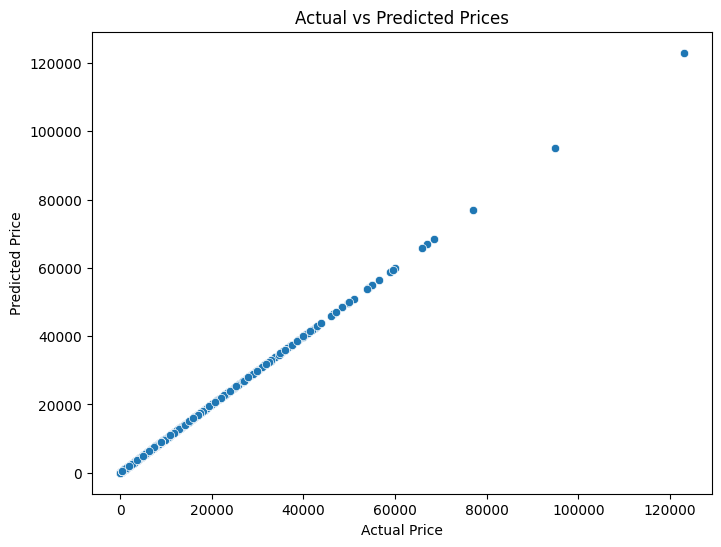

In [116]:
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

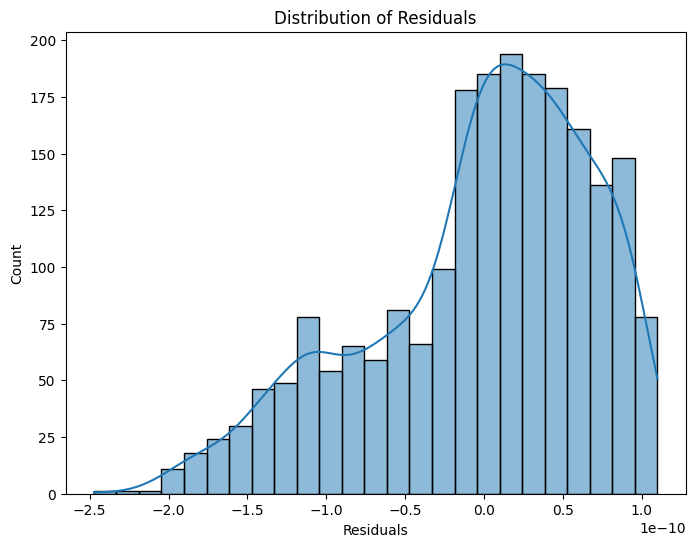

In [117]:
# Plotting the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(x=residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

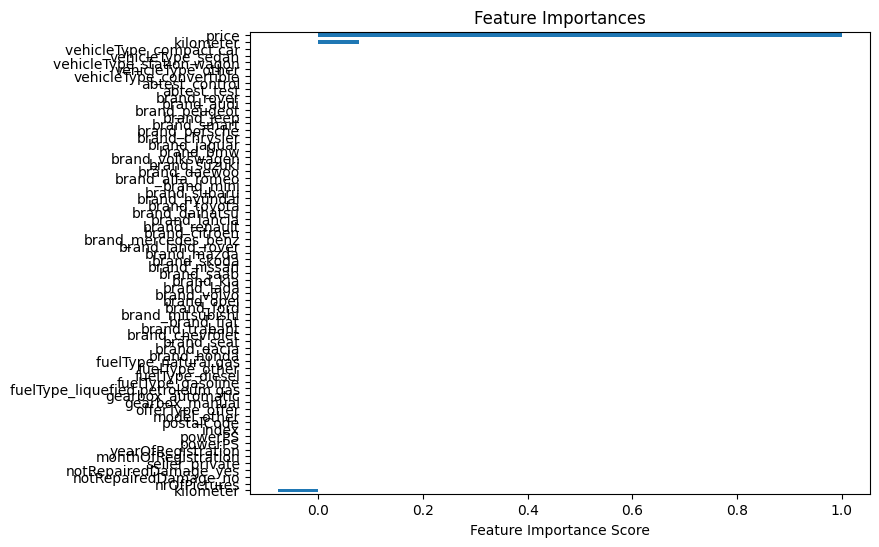

In [118]:
# Plotting the feature importances
feature_importances = pd.Series(reg_model.coef_, index=X.columns)
feature_importances = feature_importances.sort_values()
plt.figure(figsize=(8, 6))
feature_importances.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances')
plt.show()

In [121]:
# Use the trained model to predict the price of a used car
sample = X_test.iloc[0]
actual_price = y_test.iloc[0]
predicted_price = reg_model.predict([sample])[0]

print("Actual Price:", actual_price)
print("Predicted Price:", predicted_price)

Actual Price: 990
Predicted Price: 989.9999999999758


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [120]:
X

,powerPS,kilometer,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,50,40000,7,0,1980,50,40000,7,0,19348,...,0,0,0,0,0,0,1,0,1,0
1,118,150000,24,500,1990,118,150000,10,0,35390,...,0,0,0,0,0,0,0,0,0,1
2,129,150000,38,11900,2002,129,150000,11,0,10551,...,0,0,0,0,0,0,1,0,1,0
3,75,150000,211,999,1995,75,150000,10,0,76597,...,0,0,0,0,0,0,1,0,1,0
4,170,150000,337,11700,2008,170,150000,7,0,91717,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,163,150000,371070,999,1997,163,150000,8,0,22159,...,0,0,0,0,0,0,0,0,1,0
10627,68,80000,371126,3250,2010,68,80000,6,0,31228,...,0,0,0,0,0,0,0,0,0,1
10628,68,60000,371153,4900,2011,68,60000,3,0,30629,...,0,0,0,0,1,0,0,0,1,0
10629,116,150000,371256,6499,1996,116,150000,12,0,83064,...,0,0,0,0,0,0,0,0,1,0
